In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

# Random Forests

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

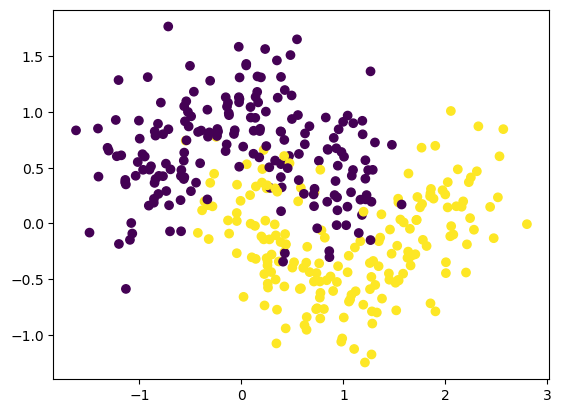

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

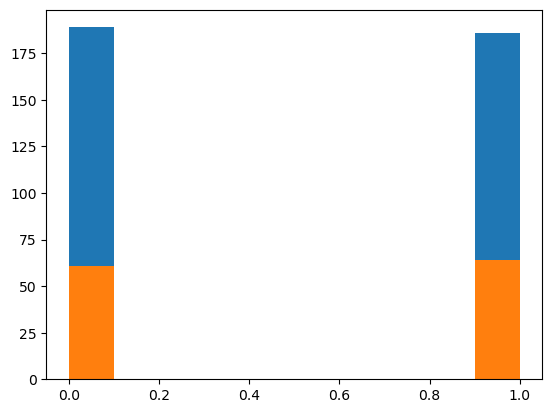

In [18]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

```python
BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
```

i

```python
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

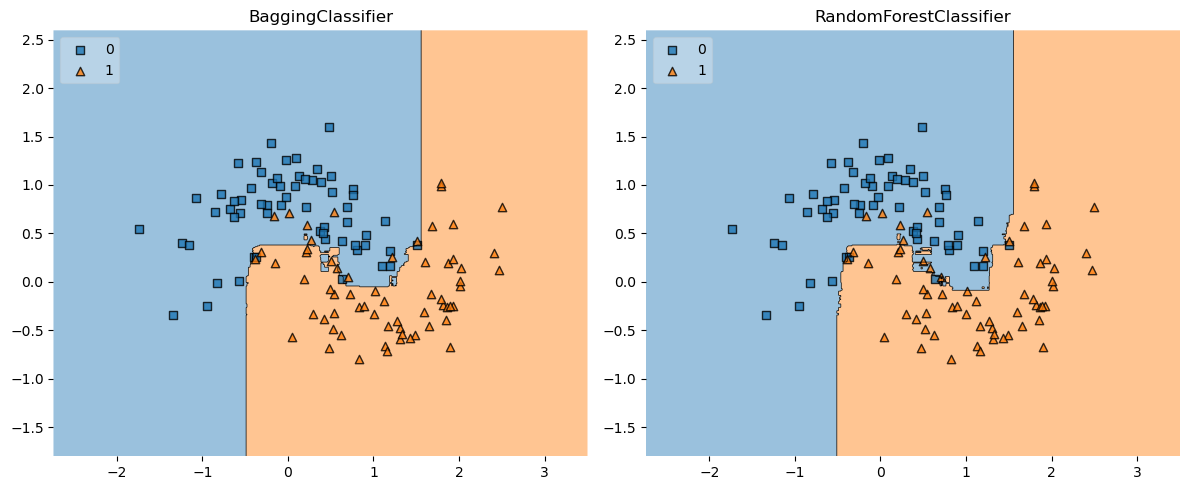

(0.912, 0.912)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

random_forest_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42
)


bagging_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_regions(X_test, y_test, clf=bagging_clf, legend=2, ax=axes[0])
axes[0].set_title("BaggingClassifier")

plot_decision_regions(X_test, y_test, clf=random_forest_clf, legend=2, ax=axes[1])
axes[1].set_title("RandomForestClassifier")

plt.tight_layout()
plt.show()

bagging_accuracy = bagging_clf.score(X_test, y_test)
random_forest_accuracy = random_forest_clf.score(X_test, y_test)

bagging_accuracy, random_forest_accuracy

# Ciekawostka - Extra-Trees 


* Gdy budujemy kolejne drzewa  w losowym lesie, w każdym węźle rozpatrywany jest losowy podzbiór elementów do podziału. 

* Możliwe jest stworzenie drzewa jeszcze bardziej losowego, wykorzystując losowe podziały dla każdej cechy, zamiast szukać najlepszych możliwych podziału (jak w przypadku zwykłych drzew decyzyjnych).

* Taki las losowy nazywa się **Extremely Randomized Trees** (lub **Extra-Trees** w skrócie). 

* Możesz utworzyć klasyfikator **Extremely Randomized Trees** za pomocą klasy **ExtraTreesClassifier** z Scikit-Learn. 

* Jego API jest identyczne z klasą RandomForestClassifier. 


# Zad.

Naucz 

```python
ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

i porównaj z powyższymi.

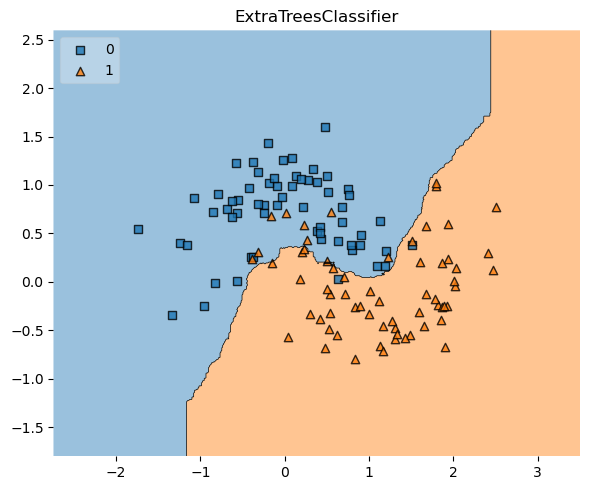

0.912

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

# Define ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42
)

# Train classifier
extra_trees_clf.fit(X_train, y_train)

# Plot decision regions
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

plot_decision_regions(X_test, y_test, clf=extra_trees_clf, legend=2, ax=ax)
ax.set_title("ExtraTreesClassifier")

plt.tight_layout()
plt.show()

# Evaluate classifier
extra_trees_accuracy = extra_trees_clf.score(X_test, y_test)

extra_trees_accuracy